# Hand Sign Project 
We will be working on a very cool problem which is classifying hand signs. In each image the hand is holding certain number of fingers up. The number of fingers held by the hand is the class number. The original dataset is in a format call h5 format. It is an efficient format to store and organize large amounts of data. [Click here to read more about it](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). The following function `load_dataset()` is ready for you to use. It will return four variables in the following order: X_train, Y_train, X_test, Y_test. Hence, your data is already splitted and there is no need for you to split it.

You can download the training datafile here https://drive.google.com/open?id=1vcbjJMj4RuuuqayUu40ScHJdSY4DZOrj

You can download the test datafile here https://drive.google.com/open?id=1rQ1RCIBzw7ho_n6x0vbMzdZ8fAzi1hIQ

Make sure you have both on the same directory as your notebook

In [1]:
import h5py
import numpy as np

def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0]),1)
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig




load the dataset 

In [2]:
#load your dataset here
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset()

Generate 20 random numbers between 0 and the length of the training dataset. Plot 20 images from the dataset using these 20 random numbers as indicies to the training dataset. You will need to plot them on 5 rows and 4 columns. In addition, each image will have a title that says `this image belons to class number X`, replace X by the correct class number from the training labels.

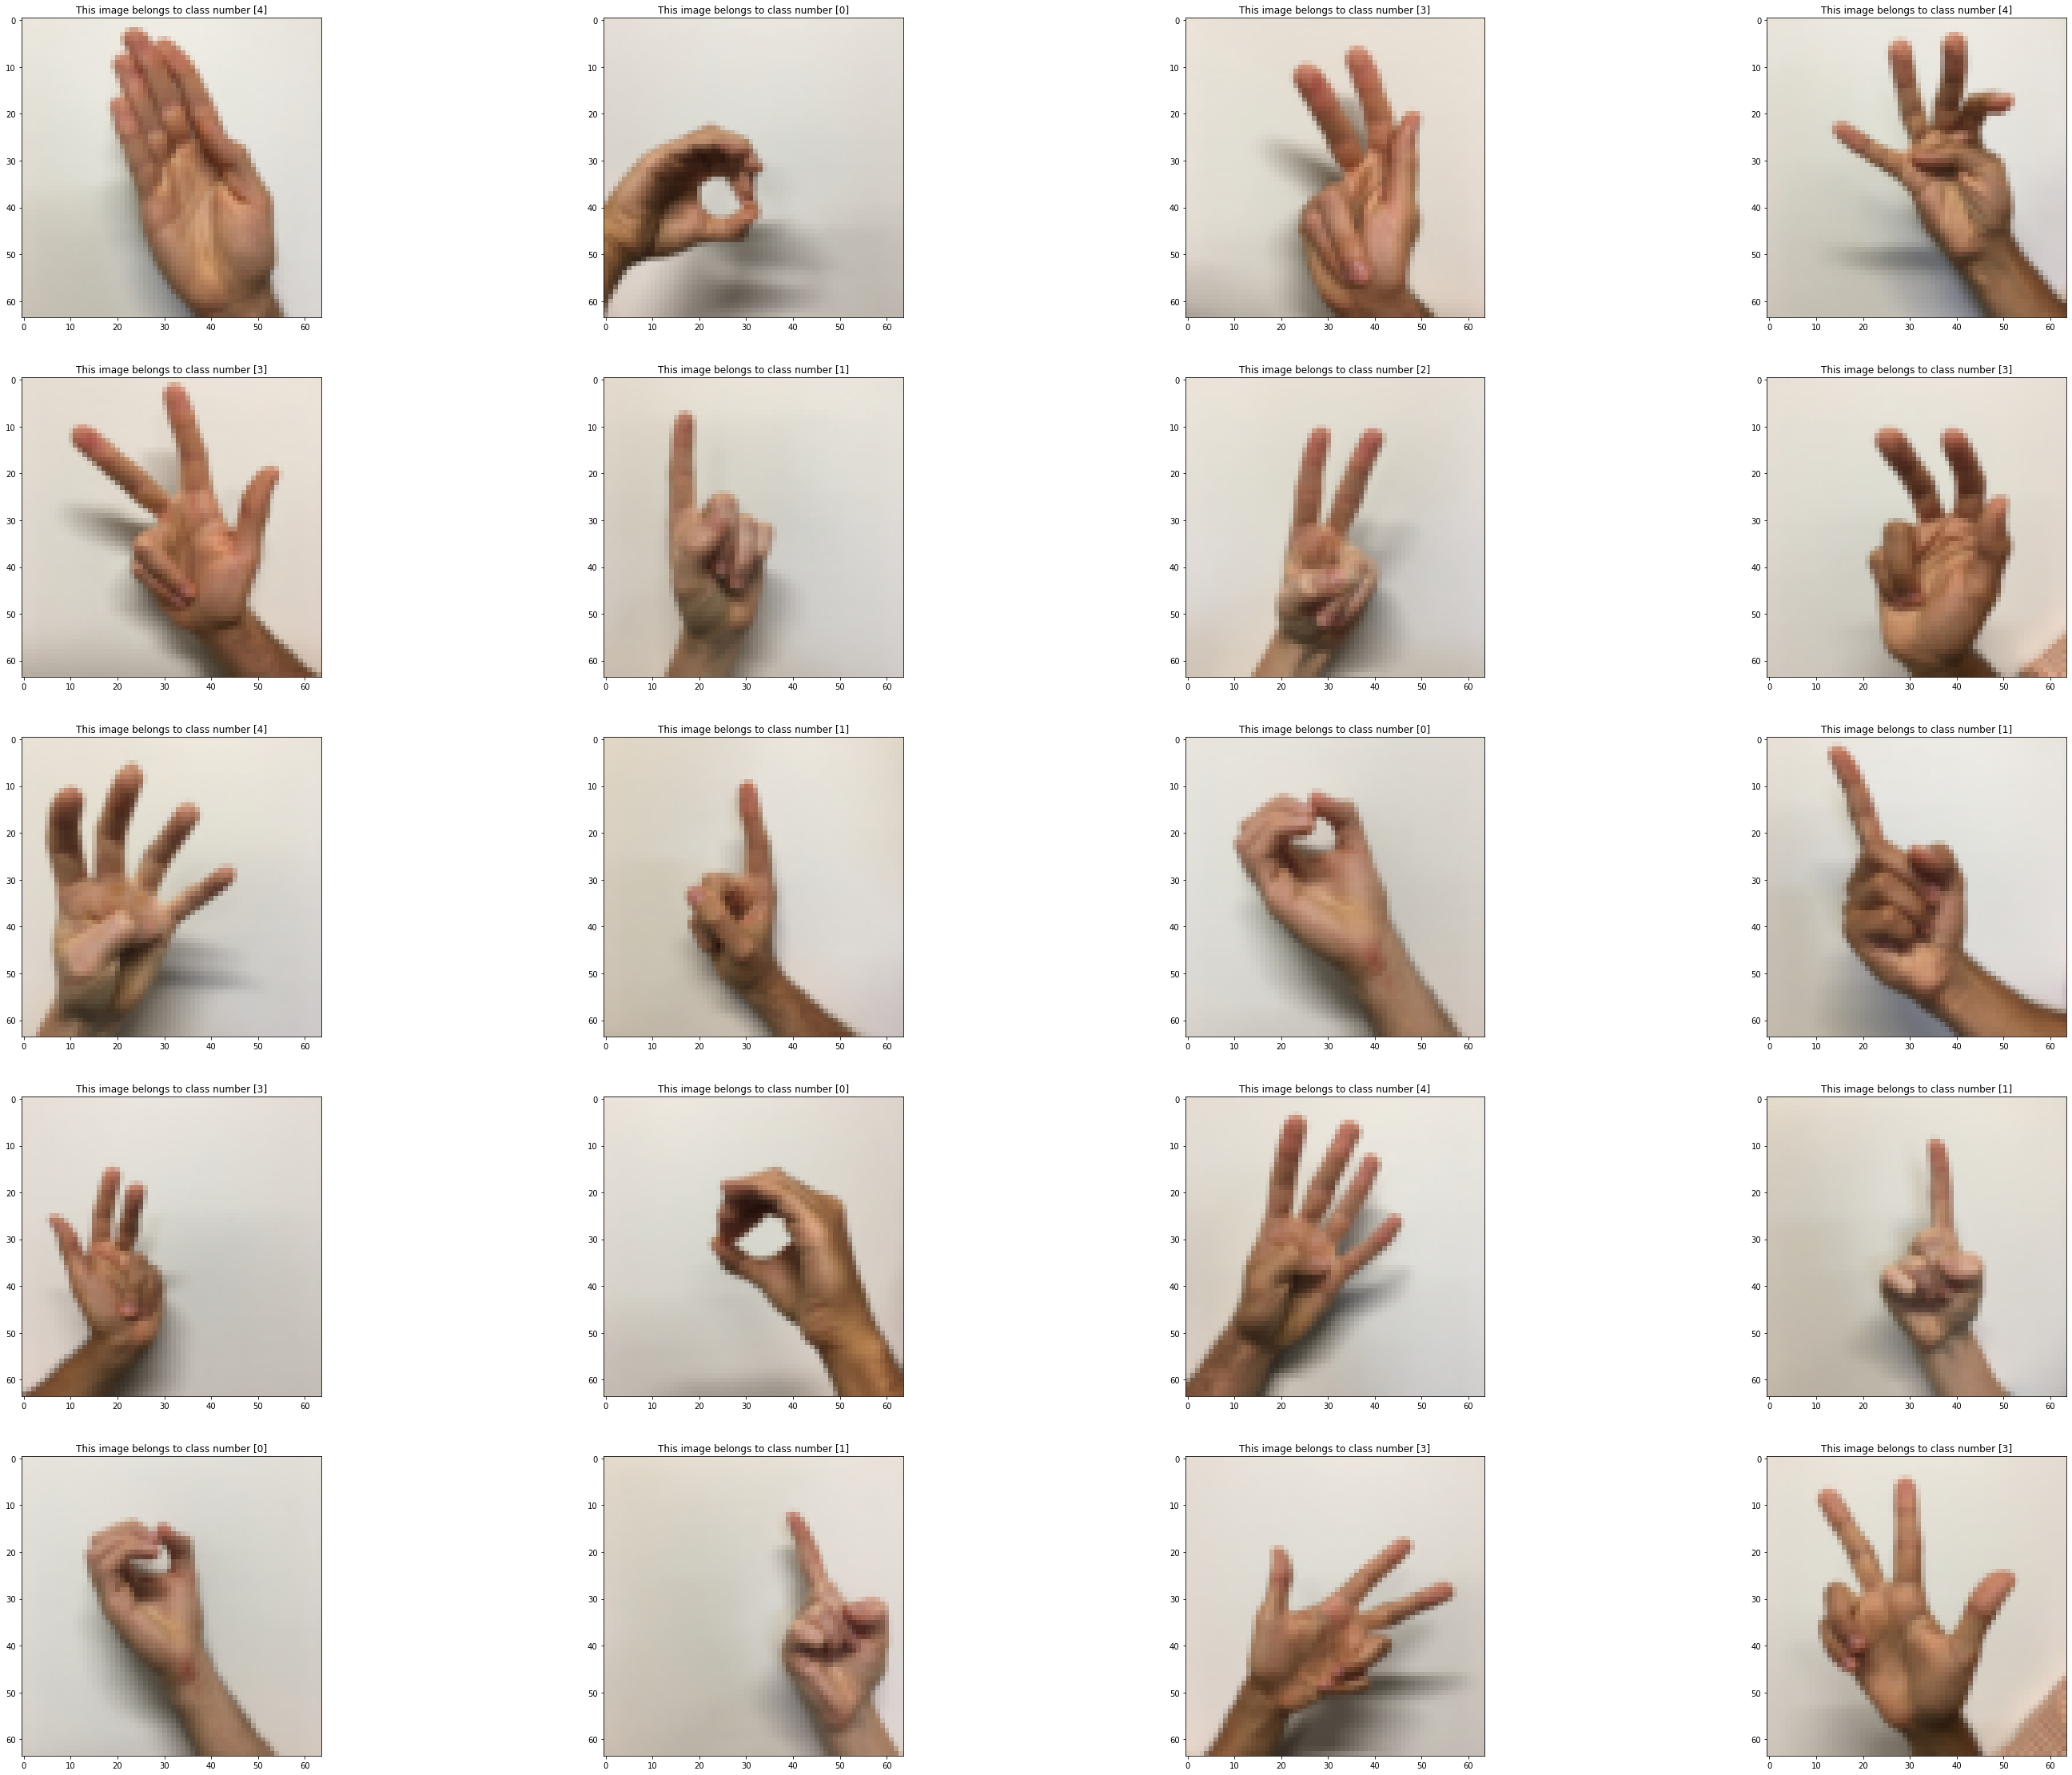

In [3]:
# Plot here 
import matplotlib.pyplot as plt
%matplotlib inline
rand = np.random.randint(low=0, high=len(X_train_orig)-1, size=20).tolist()
plt.figure(figsize=(50,40))
# loop to pick one number from the list and subplot it on its index
for i in rand:
    plt.subplot(5,4, rand.index(i)+1)
    plt.imshow(X_train_orig[i])
    plt.title('This image belongs to class number {}'.format(Y_train_orig[i]))

How many classes does the training and test dataset have?

In [4]:
# solve here
print('number of classes in the training dataset =' , len(np.unique(Y_train_orig)))
print('number of classes in the Test dataset =' , len(np.unique(Y_test_orig)))

number of classes in the training dataset = 6
number of classes in the Test dataset = 6


What is the dimension of the training dataset and test dataset?

In [5]:
# solve here
print('Shape of the training dataset =' , X_train_orig.shape)
print('Shape of the Test dataset =' , X_test_orig.shape)


Shape of the training dataset = (1080, 64, 64, 3)
Shape of the Test dataset = (120, 64, 64, 3)


Now we need to normalize the training and test dataset. The pixels are integers. We need them to be float between 0 and 1. You need to divide each of the two matrices by its max. That will produce a normalized image datasets

In [6]:
# Solve Here
X_train_orig = X_train_orig/255
X_test_orig = X_test_orig/255

## Build a Baseline Model

As you can see in the dimension (number_images X length X width X RGB), each image has 3 dimensions .. number of pixels in length and width as well as RGB contrast. We needed to flatten both the training and the test dataset so that we can feed to our ML models. To flatten an image, check the following link. https://stackoverflow.com/questions/36967920/numpy-flatten-rgb-image-array

In [9]:
# solve here
import numpy as np
X_train=X_train_orig.flatten().reshape(1080,-1)
X_test=X_test_orig.flatten().reshape(120,-1)

Now you can apply some old fashion ML. Start with a baseline model such as logistic regression. Fit the model, then evaluate the model by calculating the accuracy and the confusion matrix for the training data and test data. Note, fitting the model may take longer than a minute

In [10]:
# Solve here
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression( max_iter = 500)
mod.fit(X_train, Y_train_orig)

/Users/a_ahmedin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/a_ahmedin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
from sklearn.metrics import confusion_matrix
print("Training accuracy score is ", mod.score(X_train, Y_train_orig))
print("Test accuracy score is ", mod.score(X_test, Y_test_orig))
print("Test cm is \n ", confusion_matrix(Y_test_orig, mod.predict(X_test)))

Training accuracy score is  1.0
Test accuracy score is  0.8833333333333333
Test cm is 
  [[20  0  0  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0  1 17  1  0  1]
 [ 1  0  0 17  1  1]
 [ 0  0  1  2 14  3]
 [ 0  0  1  1  0 18]]


# Build a DNN 
Use Keras to build a small neural network. Number of hidden layers is less than 5 and each layer should have between 5 and 10 neurons. The loss for a multiclass keras problem is called `SparseCategoricalCrossentropy`. Notice that, we already have a flattening layer in DNN, so you can actually use the normalized image without the flattening step that you have done earlier when you were building logistic regression

In [36]:
# from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = Sequential()
model.add(Flatten(input_shape = X_train_orig.shape[1:]))
model.add(Dense(25, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(loss='SparseCategoricalCrossentropy', optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [37]:
model.fit(X_train_orig, Y_train_orig, epochs=500, batch_size=100, validation_data=(X_test_orig, Y_test_orig))

Epoch 1/500
11/11 [==============================] - 0s 15ms/step - loss: 1.9879 - accuracy: 0.1574 - val_loss: 1.7966 - val_accuracy: 0.1667
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 1.8080 - accuracy: 0.1870 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7919 - accuracy: 0.1685 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7930 - accuracy: 0.1620 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 5/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7918 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7918 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 7/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7918 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 8/500


### Learning Rate Optimizing
Did you notice that the it was not or learning was a little slow at the beginning? That is because of the keras learning rate is being high by default. Let's play around with the learning rate to give the DNN more change to learn. Change the compiling line for the model to `model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])` so that you can decrease the learning rate. Moreover, this is a good chance to read about the different optimizers type. Check this link.
https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3

Run your network for at least 300 epochs and use batch_size=100

What is the training and validation accuracy and confusion matrix for both?

In [38]:
model = Sequential()
model.add(Flatten(input_shape = X_train_orig.shape[1:]))
model.add(Dense(25, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(loss='SparseCategoricalCrossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

In [39]:
model.fit(X_train_orig, Y_train_orig, epochs=500, batch_size=100, validation_data=(X_test_orig, Y_test_orig))

Epoch 1/500
11/11 [==============================] - 0s 15ms/step - loss: 1.8108 - accuracy: 0.1602 - val_loss: 1.7928 - val_accuracy: 0.1667
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7899 - accuracy: 0.1907 - val_loss: 1.7875 - val_accuracy: 0.2083
Epoch 3/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7833 - accuracy: 0.2037 - val_loss: 1.7789 - val_accuracy: 0.2000
Epoch 4/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7782 - accuracy: 0.2019 - val_loss: 1.7797 - val_accuracy: 0.2167
Epoch 5/500
11/11 [==============================] - 0s 6ms/step - loss: 1.7756 - accuracy: 0.2102 - val_loss: 1.7713 - val_accuracy: 0.2083
Epoch 6/500
11/11 [==============================] - 0s 7ms/step - loss: 1.7730 - accuracy: 0.2139 - val_loss: 1.7669 - val_accuracy: 0.2167
Epoch 7/500
11/11 [==============================] - 0s 6ms/step - loss: 1.7656 - accuracy: 0.2185 - val_loss: 1.7670 - val_accuracy: 0.2333
Epoch 8/500


Given the learning rate used in the previous part, Build a new model and increase the number of layers and neurons .. maybe 7 or 8 layers with number of neurons between 200 and 1000. Do you see a difference in the accuracy?


What is the training and validation accuracy and confusion matrix for both?

**note: it may take some time to run**

In [64]:
# Solve Here
model1 = Sequential()
model1.add(Flatten(input_shape = X_train_orig.shape[1:]))
model1.add(Dense(1000, activation='relu'))
model1.add(Dense(500, activation='relu'))
model1.add(Dense(150, activation='relu'))
model1.add(Dense(150, activation='relu'))
model1.add(Dense(150, activation='relu'))
model1.add(Dense(90, activation='relu'))
model1.add(Dense(6, activation='softmax'))
# Compile model
model1.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [65]:
model1.fit(X_train_orig, Y_train_orig, epochs=500, batch_size=100, validation_data=(X_test_orig, Y_test_orig))

Epoch 1/500
11/11 [==============================] - 1s 92ms/step - loss: 3.2008 - accuracy: 0.1500 - val_loss: 2.5226 - val_accuracy: 0.1750
Epoch 2/500
11/11 [==============================] - 1s 78ms/step - loss: 2.0978 - accuracy: 0.1676 - val_loss: 1.9061 - val_accuracy: 0.1667
Epoch 3/500
11/11 [==============================] - 1s 81ms/step - loss: 1.8740 - accuracy: 0.1630 - val_loss: 1.8219 - val_accuracy: 0.2833
Epoch 4/500
11/11 [==============================] - 1s 80ms/step - loss: 1.8175 - accuracy: 0.2093 - val_loss: 1.8231 - val_accuracy: 0.3417
Epoch 5/500
11/11 [==============================] - 1s 83ms/step - loss: 1.8500 - accuracy: 0.2176 - val_loss: 1.9049 - val_accuracy: 0.1667
Epoch 6/500
11/11 [==============================] - 1s 85ms/step - loss: 1.8276 - accuracy: 0.1944 - val_loss: 1.8190 - val_accuracy: 0.2500
Epoch 7/500
11/11 [==============================] - 1s 82ms/step - loss: 1.7973 - accuracy: 0.1954 - val_loss: 1.7295 - val_accuracy: 0.2750
Epoch 

**Bonus**

See if you can change some of the parameters so that some of the epochs can reach a validation accuracy of at least 92%

In [53]:
# Solve Bonus Here
# courtesy of Dhyan
# Solve Here
from tensorflow.keras import regularizers, layers, activations

model5 = Sequential()
model5.add(Flatten(input_shape = X_train_orig.shape[1:]))
model5.add(Dense(700, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(800, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(900, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(800, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(700, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model5.add(layers.Dropout(0.2))
model5.add(Dense(6, kernel_regularizer=regularizers.l2(0.001),activation='softmax'))

# Compile model
model5.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Nadam(lr=0.0000075), metrics=['accuracy'])
history = model5.fit(X_train_orig, Y_train_orig, epochs=500, batch_size=100, validation_data=(X_test_orig, Y_test_orig))


Epoch 1/500
11/11 [==============================] - 3s 236ms/step - loss: 8.1373 - accuracy: 0.1667 - val_loss: 8.1073 - val_accuracy: 0.1500
Epoch 2/500
11/11 [==============================] - 2s 227ms/step - loss: 8.1084 - accuracy: 0.1602 - val_loss: 8.0921 - val_accuracy: 0.2083
Epoch 3/500
11/11 [==============================] - 2s 226ms/step - loss: 8.1009 - accuracy: 0.1722 - val_loss: 8.0773 - val_accuracy: 0.2167
Epoch 4/500
11/11 [==============================] - 2s 224ms/step - loss: 8.0802 - accuracy: 0.1843 - val_loss: 8.0630 - val_accuracy: 0.1833
Epoch 5/500
11/11 [==============================] - 2s 226ms/step - loss: 8.0687 - accuracy: 0.1815 - val_loss: 8.0498 - val_accuracy: 0.1833
Epoch 6/500
11/11 [==============================] - 2s 221ms/step - loss: 8.0514 - accuracy: 0.1778 - val_loss: 8.0360 - val_accuracy: 0.2167
Epoch 7/500
11/11 [==============================] - 2s 225ms/step - loss: 8.0452 - accuracy: 0.1546 - val_loss: 8.0250 - val_accuracy: 0.2083

In [54]:
model5.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 12288)             0         
_________________________________________________________________
dense_124 (Dense)            (None, 700)               8602300   
_________________________________________________________________
dropout_42 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_125 (Dense)            (None, 800)               560800    
_________________________________________________________________
dropout_43 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_126 (Dense)            (None, 900)               720900    
_________________________________________________________________
dropout_44 (Dropout)         (None, 900)             

In [63]:
model6 = Sequential()
model6.add(Flatten(input_shape = X_train_orig.shape[1:]))
model6.add(layers.Dense(1000, activation='relu',  kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(800, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(6, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))

# compile model - changed learning rate to be lower since with higher learning rate
# there was a lot of oscillation in the loss so previous model was having trouble converging
model6.compile(loss='SparseCategoricalCrossentropy', optimizer= tf.keras.optimizers.Adam(lr=0.00005), metrics=['accuracy'])
# fit model and store accuracy/loss of training and validation to be used later to evaluate model
history=model6.fit(X_train_orig, Y_train_orig, epochs=350, batch_size=100, validation_data=(X_test_orig, Y_test_orig))

Epoch 1/350
11/11 [==============================] - 2s 167ms/step - loss: 7.8220 - accuracy: 0.1889 - val_loss: 7.7438 - val_accuracy: 0.1667
Epoch 2/350
11/11 [==============================] - 2s 142ms/step - loss: 7.6734 - accuracy: 0.2269 - val_loss: 7.5825 - val_accuracy: 0.2417
Epoch 3/350
11/11 [==============================] - 2s 144ms/step - loss: 7.5130 - accuracy: 0.2528 - val_loss: 7.3881 - val_accuracy: 0.3500
Epoch 4/350
11/11 [==============================] - 2s 139ms/step - loss: 7.3050 - accuracy: 0.3722 - val_loss: 7.1501 - val_accuracy: 0.4583
Epoch 5/350
11/11 [==============================] - 2s 144ms/step - loss: 7.0851 - accuracy: 0.4111 - val_loss: 6.9316 - val_accuracy: 0.4000
Epoch 6/350
11/11 [==============================] - 2s 146ms/step - loss: 6.9044 - accuracy: 0.4139 - val_loss: 6.7554 - val_accuracy: 0.4750
Epoch 7/350
11/11 [==============================] - 2s 138ms/step - loss: 6.6913 - accuracy: 0.4704 - val_loss: 6.6395 - val_accuracy: 0.4250